# Airbnb Seattle Data Analysis and Price Prediction

The goal of this project is to perfrom analysis and prediction of Airbnb Seattle data. The dataset consists of Airbnb listings in the period of 2016 - 2017 in Seattle, including full description of the listing, average review score, price and availability. 


The questions of interest:
   1. What features contribute to the listing price? 
   2. What is the most popular area and property type?
   3. How the price and availability change over time? 

## Table of Content

1. [Introduction](#introduction) 
2. [Data Gathering](#datagathering) 
3. [Data Assessment](#dataassessment)
4. [Data Cleaning](#datacleaning) 
5. [Data Analysis](#dataanalysis)
6. [Data Modelling](#datamodelling)
7. [Conclusion](#conclusion)

## 1. Introduction <a name="introduction"></a>

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import libraries
import pandas as pd
import numpy as np
import math
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
%matplotlib inline

In [3]:
%load_ext pycodestyle_magic

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
%pycodestyle_on

## 2. Data gathering <a name="datagathering"></a>

In [6]:
# read the listings.csv and store the dataset in df_listing
df_listing = pd.read_csv('seattle_data/listings.csv')

In [7]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [8]:
df_listing.shape

(3818, 92)

In [9]:
# the dataset consists of 3818 rows and 52 columns

In [10]:
# read the calendar.csv and store the dataset in df_seattle_calendar
df_calendar = pd.read_csv('seattle_data/calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


## 3. Data assessment <a name="dataassessment"></a>

In [11]:
# a summary of the dataframe including the number of non-null values
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [12]:
# list column with more than 90% of missing values
list(df_listing.columns[df_listing.isnull().mean() > .9])

['square_feet', 'license']

In [13]:
# this returns a tuple of the dimensions of the dataframe
df_listing.shape

(3818, 92)

In [14]:
# a summary of the dataframe including the number of non-null values
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [15]:
# this returns the number of unique values in each column
df_listing.nunique()

id                                  3818
listing_url                         3818
scrape_id                              1
last_scraped                           1
name                                3792
summary                             3478
space                               3119
description                         3742
experiences_offered                    1
neighborhood_overview               2506
notes                               1999
transit                             2574
thumbnail_url                       3498
medium_url                          3498
picture_url                         3818
xl_picture_url                      3498
host_id                             2751
host_url                            2751
host_name                           1466
host_since                          1380
host_location                        120
host_about                          2011
host_response_time                     4
host_response_rate                    45
host_acceptance_

In [16]:
# list columns with only one unique value
df_listing[df_listing.columns[df_listing.nunique() == 1]].head()

,scrape_id,last_scraped,experiences_offered,market,country_code,country,has_availability,calendar_last_scraped,requires_license,jurisdiction_names
0,20160104002432,2016-01-04,none,Seattle,US,United States,t,2016-01-04,f,WASHINGTON
1,20160104002432,2016-01-04,none,Seattle,US,United States,t,2016-01-04,f,WASHINGTON
2,20160104002432,2016-01-04,none,Seattle,US,United States,t,2016-01-04,f,WASHINGTON
3,20160104002432,2016-01-04,none,Seattle,US,United States,t,2016-01-04,f,WASHINGTON
4,20160104002432,2016-01-04,none,Seattle,US,United States,t,2016-01-04,f,WASHINGTON


In [17]:
# list columns with only one unique value
df_listing[df_listing.columns[df_listing.nunique() == 2]].head()

,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,state,is_location_exact,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,100%,f,t,t,WA,t,f,f,f
1,100%,t,t,t,WA,t,f,t,t
2,100%,f,t,t,WA,t,f,f,f
3,NaN,f,t,t,WA,t,f,f,f
4,NaN,f,t,t,WA,t,f,f,f


In [18]:
# this returns descriptive statistics for each column of data
df_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [19]:
# check data type of rate columns
rate_cols = [col for col in df_listing.columns if 'rate' in col]
df_listing[rate_cols].head()

,host_response_rate,host_acceptance_rate
0,96%,100%
1,98%,100%
2,67%,100%
3,NaN,NaN
4,100%,NaN


In [20]:
# check the most popular property types
df_listing.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

In [21]:
df_listing.bedrooms.value_counts()

1.0    2417
2.0     640
0.0     372
3.0     283
4.0      69
5.0      24
6.0       6
7.0       1
Name: bedrooms, dtype: int64

In [22]:
# most properties are one-bedroom

In [23]:
df_listing.beds.value_counts()

1.0     2201
2.0      912
3.0      433
4.0      152
5.0       73
6.0       21
7.0       14
8.0        4
9.0        4
10.0       2
15.0       1
Name: beds, dtype: int64

In [24]:
# most properties have one bed

In [25]:
df_listing.guests_included.value_counts()

1     2275
2      989
4      237
0       92
3       80
6       71
5       28
8       24
7       14
9        2
10       2
15       1
13       1
11       1
12       1
Name: guests_included, dtype: int64

In [26]:
# most properties accomodate one guest

In [27]:
df_listing.neighbourhood_group_cleansed.value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [28]:
# Capitol Hil and Downtown are the most popular neighbourhoods

In [29]:
# count of duplicates in the dataset
sum(df_listing.duplicated())

0

In [30]:
# count of duplicates in the dataset
sum(df_calendar.duplicated())

0

### Assessment results

The following data quality issues has been found:
    
**df_listing** dataset:
1. listing_url repeats listing_id column because all listigns have been published on the same airbnb domain, hence this column can be dropped
2. there are columns 'square_feet' and 'license' with more than 90% of missing values which can be dropped
3. 10 columns which have only one unique value are is not useful for analysis and can be dropped
4. all url columns can be dropped because they are not be used in the analysis
5. rate columns have object data type. We need to remove % sybmol and convert them to numeric 
6. the price and fee columns have object type. We need to remove currency symbol and convert them to numeric
7. there are 7 columns which have values either "f" or "t", this can be converted to 1 and 0 to be able to use these columns in the prediction model and also to save memory space
8. all dates columns are currently repsresented as object and should be converted to a date format
9. host_listing_count and host_total_listing_count are identical, one of them can be dropped
10. replace missing values in beds and bedrooms column with mode which is 1

**df_calendar** dataset:
1. date should be converted from object to a date format
2. the currency symbol should be removed from the price column and the column should be converted to float
2. availability column values should be converted to 1 and 0 


## 4. Data cleaning <a name="datacleaning"></a>

### 4.1 Cleaning of df_listing dataset <a name="cleaning_listing"></a>

In [31]:
# deleting of url columns
url_cols = [col for col in df_listing.columns if 'url' in col]
df_listing.drop(url_cols, axis=1, inplace=True)

In [32]:
# deleting columns with more than 90% of missing values
miss_cols = list(df_listing.columns[df_listing.isnull().mean() > .9])
df_listing.drop(miss_cols, axis=1, inplace=True)

In [33]:
# delete columns with only one unique value
cols = list(df_listing.columns[df_listing.nunique() == 1])
df_listing.drop(cols, axis=1, inplace=True)

In [34]:
# convert rate columns to numeric
cols = ['host_response_rate', 'host_acceptance_rate']
for col in cols:
    df_listing[col] = df_listing[col].str.replace('%', '').astype(float)

In [35]:
# convert prices and fees columns to numeric
cols = ['price',
        'weekly_price',
        'monthly_price',
        'security_deposit',
        'cleaning_fee',
        'extra_people']
for col in cols:
    df_listing[col] = df_listing[col]\
        .str.replace('$', '').str.replace(',', '').astype(float)

In [36]:
def convert_to_0_and_1(x):
    ''' This function converts t to 1 and f to 0
        Args:
            x(str): the value of the column which the function applies to
        Returns:
            int: the return value. 1 for 't' and 0 for 'f'
    '''
    if x == 't':
        return 1
    elif x == 'f':
        return 0
    else:
        return None

In [37]:
# convert columns with t and f values to numeric with 1 and 0
cols = ['host_is_superhost',
        'host_has_profile_pic',
        'host_identity_verified',
        'is_location_exact',
        'instant_bookable',
        'require_guest_profile_picture',
        'require_guest_phone_verification']
for col in cols:
    df_listing[col] = df_listing[col].apply(lambda x: convert_to_0_and_1(x))

In [38]:
cols = ['host_since',
        'first_review',
        'last_review']

# conversion to datetime format
for col in cols:
    df_listing[col] = pd.to_datetime(df_listing[col])

In [39]:
df_listing.drop('host_total_listings_count', axis=1, inplace=True)

In [40]:
df_listing.describe()

,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3295.000000,3045.000000,3816.000000,3816.000000,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,2009.000000,1517.000000,1866.000000,2788.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818.000000,3818.000000,3818.000000,3818.000000,3191.000000
mean,5.550111e+06,1.578556e+07,94.886798,99.967159,0.203878,7.157757,0.998166,0.785377,47.628961,-122.333103,0.893662,3.349398,1.259469,1.307712,1.735394,127.976166,788.481832,2613.336190,287.610397,61.710904,1.672603,10.667627,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,0.154793,0.084075,0.098219,2.946307,2.078919
std,2.962660e+06,1.458382e+07,11.866705,1.812201,0.402932,28.628149,0.042796,0.410614,0.043052,0.031745,0.308311,1.977599,0.590369,0.883395,1.139480,90.250022,532.352269,1722.267981,270.222690,48.830341,1.311040,17.585922,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,0.361755,0.277537,0.297649,5.893029,1.822348
min,3.335000e+03,4.193000e+03,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,47.505088,-122.417219,0.000000,1.000000,0.000000,0.000000,1.000000,20.000000,100.000000,500.000000,95.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.020000
25%,3.258256e+06,3.275204e+06,98.000000,100.000000,0.000000,1.000000,1.000000,1.000000,47.609418,-122.354320,1.000000,2.000000,1.000000,1.000000,1.000000,75.000000,455.000000,1512.000000,150.000000,25.000000,1.000000,0.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.695000
50%,6.118244e+06,1.055814e+07,100.000000,100.000000,0.000000,1.000000,1.000000,1.000000,47.623601,-122.328874,1.000000,3.000000,1.000000,1.000000,1.000000,100.000000,650.000000,2200.000000,250.000000,50.000000,1.000000,0.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,1.000000,1.540000
75%,8.035127e+06,2.590309e+07,100.000000,100.000000,0.000000,3.000000,1.000000,1.000000,47.662694,-122.310800,1.000000,4.000000,1.000000,2.000000,2.000000,150.000000,950.000000,3150.000000,300.000000,83.000000,2.000000,20.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,2.000000,3.000000
max,1.034016e+07,5.320861e+07,100.000000,100.000000,1.000000,502.000000,1.000000,1.000000,47.733358,-122.240607,1.000000,16.000000,8.000000,7.000000,15.000000,1000.000000,6300.000000,19500.000000,5000.000000,300.000000,15.000000,300.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.0000

In [41]:
# fill missing values with mode as the majority of Airbnb listings have 1 bed.
for col in ['bedrooms', 'beds', 'guests_included']:
    df_listing[col].fillna(df_listing[col].mode()[0], inplace=True)
    df_listing[col] = df_listing[col].astype('int64')

### 4.2 Cleaning of df_seattle_calendar dataset

In [42]:
# convert date column to a date format
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

In [43]:
df_calendar.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [44]:
# convert available column to numeric
df_calendar['available'] = df_calendar['available']\
    .apply(lambda x: convert_to_0_and_1(x))

In [45]:
# remove currency symbol from price and convert to numeric
df_calendar['price'] = df_calendar['price'].str.replace('$', '')\
    .str.replace(',', '').astype(float)

## 5. Data Analysis <a name="dataanalysis"></a>

### 5.1 Analysis of df_listing dataset

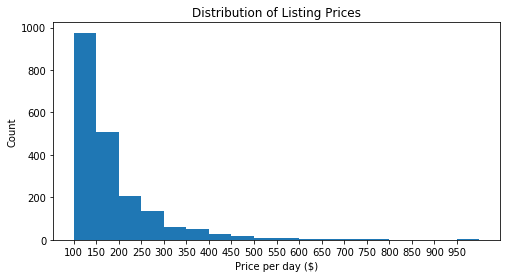

In [46]:
plt.figure(figsize=[8, 4])
bin_edges = np.arange(100, df_listing['price'].max()+50, 50)
plt.hist(data=df_listing, x='price', bins=bin_edges)
#
plt.xlabel("Price per day ($)")
plt.ylabel('Count')
plt.title("Distribution of Listing Prices")
plt.xticks(np.arange(100, 1000, 50))
plt.show()

The price distribution is highly skewed. The majority of properties cost about 100-150 per night and only a few properties with the price > 900 $

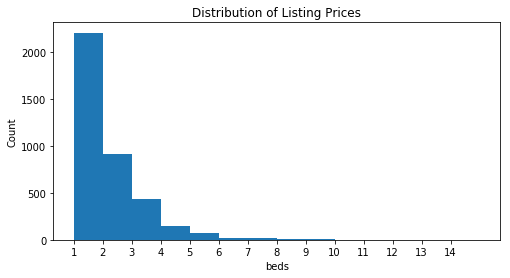

In [47]:
plt.figure(figsize=[8, 4])
bin_edges = np.arange(1, df_listing['beds'].max()+1, 1)
plt.hist(data=df_listing, x='beds', bins=bin_edges)
#
plt.xlabel("beds")
plt.ylabel('Count')
plt.title("Distribution of Listing Prices")
plt.xticks(np.arange(1, 15, 1))
plt.show()

The distribution shows that the majority of properties are one-bedroom

In [48]:
corr = df_listing.corr()
corr.style.background_gradient(cmap='coolwarm')

/Users/mila/anaconda3/envs/myenv/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


From the correlation table we can see that accomodates, beds, bathrooms, bedrooms have the highest correlation with the price.

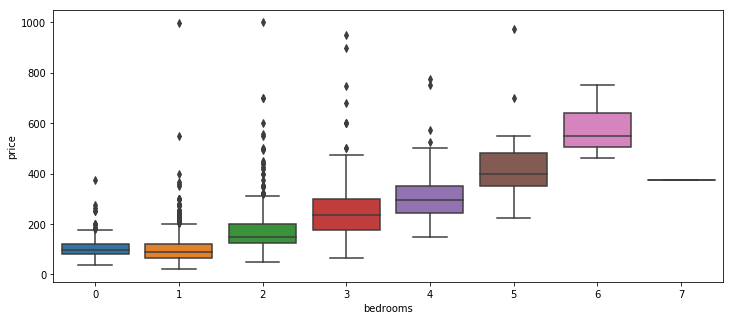

In [49]:
plt.figure(figsize=[12, 5])
sb.boxplot(data=df_listing, x='bedrooms', y='price')
plt.show()

The chart shows that the average price increases with the numbers of rooms increases. There are few outliers with the price above 800 $. The highest number of bedrooms, the higher variability in price.

**Analysis of Property Types**

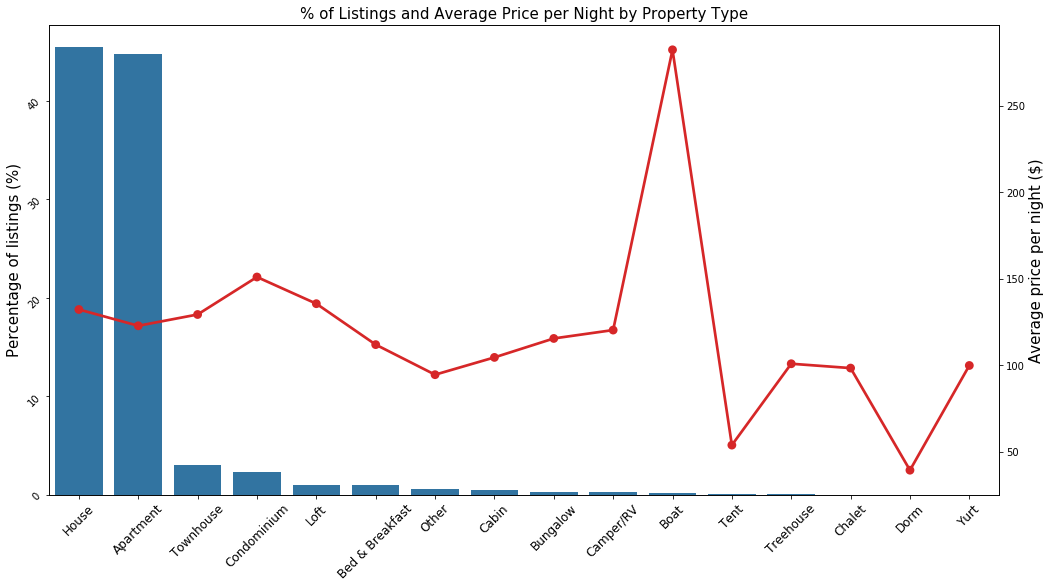

In [50]:
fig, ax1 = plt.subplots(figsize=[14.70, 8.27])

counts = df_listing.groupby('property_type')['price']\
    .agg(['mean', 'count']).reset_index()\
    .sort_values(by=['count'], ascending=False)

counts['proportion'] = counts['count']*100 / counts['count'].sum()

base_color = sb.color_palette()[0]
color = 'tab:red'
color2 = 'tab:green'
a = sb.barplot(data=counts,
               x='property_type',
               y='proportion',
               color=base_color,
               ax=ax1)

a.set_xticklabels(a.get_xticks(), size=12)

ax1.set_ylabel('Percentage of listings (%)', fontsize=15)
ax2 = ax1.twinx()

b = sb.pointplot(data=counts,
                 x='property_type',
                 y='mean',
                 color=color, ax=ax2)

ax2.set_ylabel('Average price per night ($)', fontsize=15)
ax1.set_xlabel('')
ax1.tick_params(labelrotation=45)
ax1.set_title("% of Listings and Average Price per Night by Property Type",
              fontsize=15)

fig.tight_layout()
plt.show()

The chart shows that houses and apartments are the most popular accommodations in Seattle with average price per night of 140 usd, making together 90% of all listed properties.

Boat houses are the most expensive properties, almost double the price compared to the second most expensive Condominium. As expected, tents and dorms are the cheapest options.

**Analysis of Neighbourhoods**

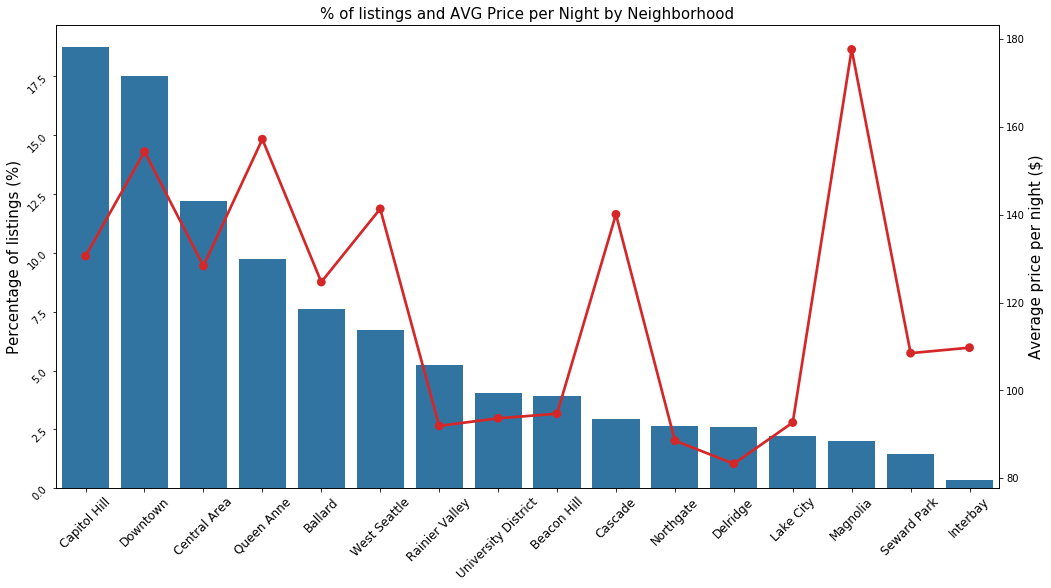

In [51]:
fig, ax1 = plt.subplots(figsize=[14.70, 8.27])

counts = df_listing[
    df_listing['neighbourhood_group_cleansed'] != "Other neighborhoods"]\
    .groupby('neighbourhood_group_cleansed')['price']\
    .agg(['mean', 'count']).reset_index()\
    .sort_values(by=['count'], ascending=False)

counts['proportion'] = counts['count']*100 / counts['count'].sum()

base_color = sb.color_palette()[0]
color = 'tab:red'
color2 = 'tab:green'
a = sb.barplot(data=counts,
               x='neighbourhood_group_cleansed',
               y='proportion',
               color=base_color,
               ax=ax1)

a.set_xticklabels(a.get_xticks(), size=12)

ax1.set_ylabel('Percentage of listings (%)', fontsize=15)
ax2 = ax1.twinx()

b = sb.pointplot(data=counts,
                 x='neighbourhood_group_cleansed',
                 y='mean',
                 color=color,
                 ax=ax2)

ax2.set_ylabel('Average price per night ($)',
               fontsize=15)
ax1.set_xlabel('')
ax1.tick_params(labelrotation=45)
ax1.set_title("% of listings and AVG Price per Night by Neighborhood",
              fontsize=15)

fig.tight_layout()
plt.show()

The chart shows that Capitol Hill and Downtown are two the most popular neighborhoods in Seattle.

Rainier Valley, University District, Beacon Hill, Northgate, Delridge and Lake City are amongst the most affordable neighborhoods in Seatlle.  

Magnolia is the most expensive neighbourhood with nearly 180 usd per night and Delridge is the least expensive. 

**Analysis of Room and Bed Types**

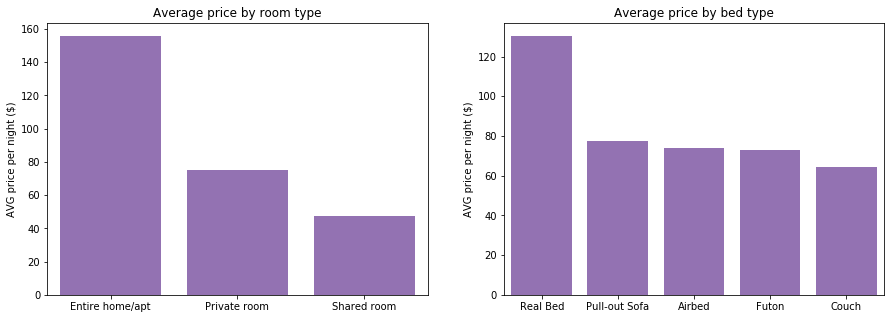

In [52]:
plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)

base_color = sb.color_palette()[4]

ct_counts = df_listing.groupby('room_type')['price'].mean()
ct_counts = ct_counts.reset_index(name='avg_price')\
    .sort_values(by=['avg_price'], ascending=False)
sb.barplot(x="room_type", y="avg_price", data=ct_counts, color=base_color)
plt.xlabel('')
plt.ylabel('AVG price per night ($)')
plt.title("Average price by room type")

plt.subplot(1, 2, 2)
ct_counts = df_listing.groupby('bed_type')['price'].mean()
ct_counts = ct_counts.reset_index(name='avg_price')\
    .sort_values(by=['avg_price'], ascending=False)
sb.barplot(x="bed_type", y="avg_price", data=ct_counts, color=base_color)
plt.xlabel('')
plt.ylabel('AVG price per night ($)')
plt.title("Average price by bed type")
plt.show()

Entire home/apartments cost almost double compared to private rooms. Shared room has the lowest cost. 

Properties with real beds cost almost twice higher than with other bed types.

**Analysis of Amenities**

In [53]:
possible_vals = ["Internet",
                 "Kitchen",
                 "Free Parking on Premises",
                 "Part-time/evening courses",
                 "Heating",
                 "Family/Kid Friendly",
                 "Washer",
                 "Dryer",
                 "Essentials",
                 "Smoke Detector",
                 "Laptop Friendly Workspace",
                 "Wireless Internet",
                 "Hangers",
                 "Fire Extinguisher",
                 "Iron",
                 "24-Hour Check-in"]

In [54]:
def total_count(df, col1, col2, look_for):
    '''
    Args:
        df - the pandas dataframe you want to search
        col1 - the column name you want to look through
        col2 - the column you want to count values from
        look_for - a list of strings to search for in each row of df[col]
    Returns:
    new_df - a dataframe of each look_for with the its frequency
    '''
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

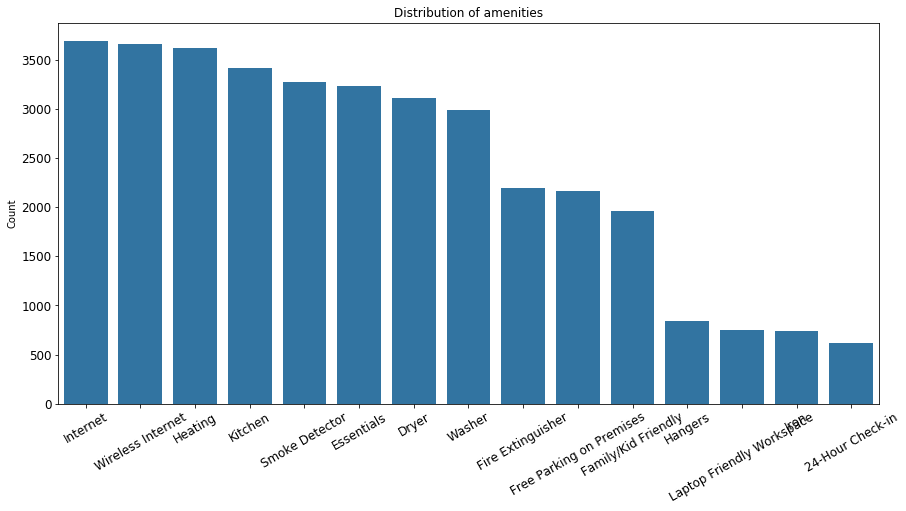

In [55]:
amenities_count = df_listing['amenities'].value_counts().reset_index()
amenities_count.rename(columns={'index': 'method', 'amenities': 'count'},
                       inplace=True)
df_amenities = total_count(amenities_count, 'method', 'count', possible_vals)
plt.figure(figsize=[14.70, 7])
base_color = sb.color_palette()[0]
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
sb.barplot(x="method", y="count", data=df_amenities, color=base_color)
plt.title('Distribution of amenities')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

### 5.2 Analysis of df_calendar dataset

In [56]:
df_calendar['period'] = df_calendar['date'].dt.strftime('%Y-%m')

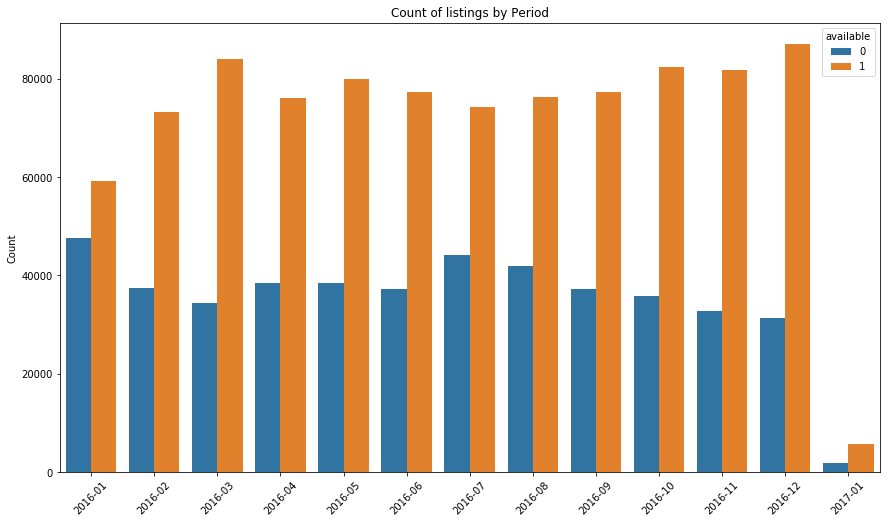

In [57]:
plt.figure(figsize=[14.70, 8.27])
plt.xticks(rotation=45)
sb.countplot(data=df_calendar, x='period', hue='available')
plt.title('Count of listings by Period')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [58]:
df_calendar_available = df_calendar[df_calendar['available'] == 1]

In [59]:
df_calendar_available = df_calendar_available\
    .groupby('period')['price'].mean().reset_index()

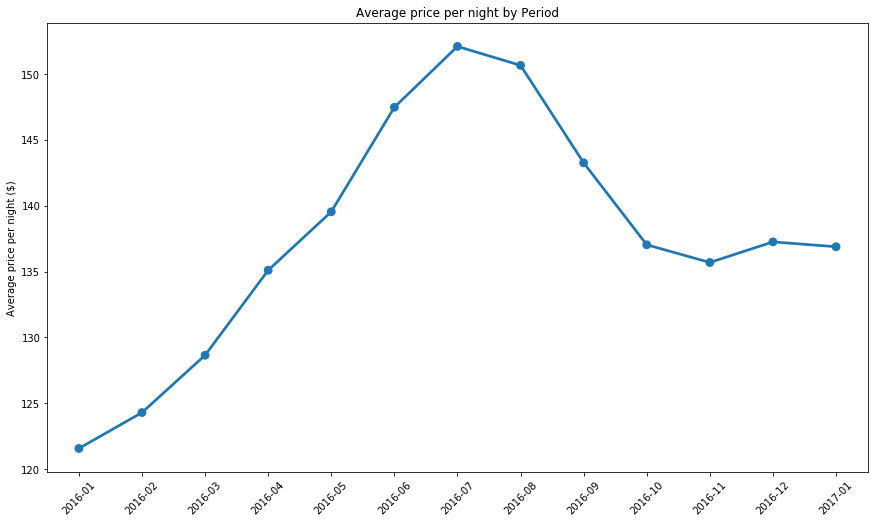

In [60]:
plt.figure(figsize=[14.70, 8.27])
plt.xticks(rotation=45)
sb.pointplot(data=df_calendar_available, x='period', y='price')
plt.title('Average price per night by Period')
plt.xlabel('')
plt.ylabel('Average price per night ($)')
plt.show()

The lowest price was in January 2016. It started to climb sharply reaching its peak of 160usd per night in July. After August the price to dropped to about 138 usd in October and remained quite stable until the end of the year. 

## 6. Data Modelling <a name="datamodelling"></a>

### 6.1 Model preparation

From the correlation matrix we can see that the column beds is highly correlated with accommodates, bathrooms, beds, guests_included.

We can safely keep only one of those columns and drop other highly correlated columns for the modelling.

In [61]:
df_listing.drop(columns=['accommodates',
                         'bathrooms',
                         'guests_included',
                         'beds'],
                inplace=True)

We want to predict only the **price** column. Hence other prices columns can be dropped

In [62]:
df_listing.drop(columns=['weekly_price',
                         'monthly_price',
                         'cleaning_fee',
                         'security_deposit'], inplace=True)

**review_score_rating** columns is highly correlated with other review columns, therefore we can safely drop them and keep only review_score_rating

In [63]:
cols_review = [
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]
df_listing.drop(columns=cols_review, inplace=True)

**reviews_per_month** and **number_of_reviews** are highly correlated so we can drop on of them

In [64]:
df_listing.drop(columns=['reviews_per_month'], inplace=True)

availabilities columns are highly correlated, so we can drop them and keep only one

In [65]:
df_listing.drop(columns=['availability_60',
                         'availability_90', 
                         'availability_365'], 
                inplace=True)

2:44: W291 trailing whitespace
3:46: W291 trailing whitespace


**require_guest_profile_picture** and **require_guest_phone_verification** are highly correlatated

In [66]:
df_listing.drop(columns=['require_guest_phone_verification'], inplace=True)

In [67]:
corr = df_listing.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,bedrooms,price,extra_people,minimum_nights,maximum_nights,availability_30,number_of_reviews,review_scores_rating,instant_bookable,require_guest_profile_picture,calculated_host_listings_count
id,1,0.546514,-0.0253249,0.00604234,-0.161255,-0.0233118,-0.011361,-0.15266,-0.0161428,0.0133601,-0.181602,-0.0632024,-0.0462891,-0.0848146,-0.0216012,0.101529,-0.0680666,-0.506105,0.0392456,0.0432498,-0.233137,-0.0513478
host_id,0.546514,1,-0.0245395,-0.0103718,-0.123449,-0.0696127,-0.0341113,-0.259153,-0.0242174,0.0147487,-0.0824411,-0.0750771,-0.0513323,-0.047363,-0.0245718,0.0575315,-0.0296772,-0.261822,0.0273475,0.0850393,-0.261103,-0.17604
host_response_rate,-0.0253249,-0.0245395,1,-0.00798736,0.15381,0.0221473,-0.000371943,0.0903869,-0.0213876,-0.0123551,0.0964722,-0.00381875,-0.0140711,0.019094,0.00660402,-0.0821176,-0.0471498,0.104779,0.156567,0.0940173,0.0158407,-0.087481
host_acceptance_rate,0.00604234,-0.0103718,-0.00798736,1,0.0101597,0.00436535,-0.000569192,0.0384335,0.00452032,-0.00305366,-0.0062544,0.00596319,0.00590018,0.0114829,-0.000645499,-0.0135093,-0.0195013,0.00894364,-0.0162176,-0.0391258,0.00601407,0.00670509
host_is_superhost,-0.161255,-0.123449,0.15381,0.0101597,1,-0.0402605,0.00649306,0.145719,-0.00864038,-0.0257871,0.0607008,-0.0290013,0.0122719,0.041993,-0.00581022,-0.0376061,0.0134224,0.261822,0.240895,0.0818187,0.099724,-0.0934818
host_listings_count,-0.0233118,-0.0696127,0.0221473,0.00436535,-0.0402605,1,0.0092221,0.0867908,-0.0125114,-5.53948e-05,0.000951572,0.0649078,0.0939622,-0.0634861,0.00189375,0.022684,0.119792,-0.0622201,-0.109357,-0.0443402,0.103776,0.224222
host_has_profile_pic,-0.011361,-0.0341113,-0.000371943,-0.000569192,0.00649306,0.0092221,1,0.0820059,0.00210501,-0.00368131,0.00506949,0.008004,-0.0179395,-0.0105634,0.000596458,-0.00102238,-0.0319483,0.019419,-0.0196187,-0.0155037,0.0129919,0.0141644
host_identity_verified,-0.15266,-0.259153,0.0903869,0.0384335,0.145719,0.0867908,0.0820059,1,-0.0204657,-0.0235578,0.0493983,-0.00797865,0.00537929,0.0466759,-0.0277563,-0.012662,0.0221348,0.0971917,0.0846087,-0.00204306,0.112435,0.0587923
latitude,-0.0161428,-0.0242174,-0.0213876,0.00452032,-0.00864038,-0.0125114,0.00210501,-0.0204657,1,-0.155092,0.0337749,0.0393535,-0.00890423,0.00213235,-0.00122164,-0.00470463,-0.0197515,-0.0327608,-0.0380864,-0.0196081,-0.0650699,0.0267495
longitude,0.0133601,0.0147487,-0.0123551,-0.00305366,-0.0257871,-5.53948e-05,-0.00368131,-0.0235578,-0.155092,1,0.0226446,-0.0549068,-0.10242,0.00585124,0.00340599,-0.0104352,-0.0072312,-0.0082602,-0.047121,-0.00952414,-0.041591,0.0863431


### 6.2 Simple Linear Regression model

Pick the **beds** column which has the highest correlation with **price**

In [68]:
target_col = 'price'

In [69]:
feature_cols = ['bedrooms']

In [70]:
# split the data into the predictors and the target variable
features = df_listing[feature_cols]
target = df_listing[target_col]

In [71]:
# randomly split the data into training and test, 30% and 70% respectfully
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=.30,
                                                    random_state=42)

In [72]:
# train linear regression model
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

LinearRegression()

In [73]:
lm_model.score(X_test, y_test)

0.432488237288979

In [74]:
# use X_test to predict the price
y_pred = lm_model.predict(X_test)

In [75]:
# compare predictions with actual prices
df_predictions = pd.DataFrame(dict(observed=y_test, predicted=y_pred))
df_predictions.head()

,observed,predicted
2562,55.0,108.656706
1425,82.0,108.656706
2186,68.0,108.656706
3494,58.0,108.656706
3046,130.0,108.656706


In [76]:
# calculate root mean square error
math.sqrt(mean_squared_error(y_test, y_pred))

69.71308942447521

### 6.3 Multiple Linear Regression model

In [77]:
numerics = ['int64', 'float64']

df_listing_new = df_listing.select_dtypes(include=numerics).copy()

In [78]:
# drop columns with lowest correlation coefficient with a price column
cols = ['host_acceptance_rate', 'id', 'host_id']
df_listing_new.drop(columns=cols, inplace=True)

In [79]:
df_listing_new['review_scores_rating'] = \
    df_listing_new['review_scores_rating'].\
    fillna(df_listing_new['review_scores_rating'].mode()[0])

In [80]:
df_listing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 19 columns):
host_response_rate                3295 non-null float64
host_is_superhost                 3816 non-null float64
host_listings_count               3816 non-null float64
host_has_profile_pic              3816 non-null float64
host_identity_verified            3816 non-null float64
latitude                          3818 non-null float64
longitude                         3818 non-null float64
is_location_exact                 3818 non-null int64
bedrooms                          3818 non-null int64
price                             3818 non-null float64
extra_people                      3818 non-null float64
minimum_nights                    3818 non-null int64
maximum_nights                    3818 non-null int64
availability_30                   3818 non-null int64
number_of_reviews                 3818 non-null int64
review_scores_rating              3818 non-null float64
instant_b

In [81]:
# it should be no missing values in data
df_listing_new.dropna(how='any', axis=0, inplace=True)

In [82]:
feature_cols = list(df_listing_new.columns)
feature_cols.remove(target_col)

In [83]:
# split the data into the predictors and the target variable
features = df_listing_new[feature_cols]
target = df_listing_new[target_col]

In [84]:
# randomly split data into training and test, 30% and 70% respectfully
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=.30,
                                                    random_state=42)

In [85]:
# train linear regression model
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

LinearRegression()

In [86]:
lm_model.score(X_test, y_test)

0.4802695386884369

In [87]:
# additing multiple features has improved the prediction score from 43%  to 48%

In [88]:
# use X_test to predict the price
y_pred = lm_model.predict(X_test)

In [89]:
# compare predictions with actual prices
df_predictions = pd.DataFrame(dict(observed=y_test, predicted=y_pred))
df_predictions.head()

,observed,predicted
3586,129.0,91.339660
3661,99.0,136.283515
3587,125.0,30.036400
2219,65.0,95.568443
2734,145.0,98.950393


In [90]:
# calculate root mean square error
math.sqrt(mean_squared_error(y_test, y_pred))

59.64872942321432

In [91]:
np.set_printoptions(suppress=True)

In [92]:
model_coeffs = lm_model.coef_

In [93]:
pd.set_option('display.float_format', '{:.5f}'.format)

In [94]:
df_coeffs = pd.DataFrame(data=model_coeffs,
                         index=feature_cols,
                         columns=['Value'])
df_coeffs

,Value
host_response_rate,-0.29188
host_is_superhost,11.92829
host_listings_count,0.21235
host_has_profile_pic,-59.66938
host_identity_verified,-0.29021
latitude,-72.83205
longitude,-222.27681
is_location_exact,-3.19166
bedrooms,60.02706
extra_people,0.58682


Feature bedroom, latitude and longitude, host has profile picture has the greates impact on price.

Maximum and minimum nights, availability 30 , host response rate has the smallest effect on price.

### 6.4 Multiple Linear Regression model including categorical features 

Let's include **property type** and **neighbourhood_group_cleansed** in the model as they showed a strong relation with price in the Data Analysis section.

In [95]:
cat_cols = ['property_type',
            'neighbourhood_group_cleansed',
            'room_type',
            'bed_type']


def create_dummy_df(df, cat_cols, dummy_na):
    '''
    Conversion of categorical variables cat_cols into dummy variables.
    cat_cols are dropped from the dataframe (df) and a new column
    for each unique value of cat_cols is added to df.
    Args:
        df: input dataframe
        cat_cols: caregorical columns you want to create dummy variables to
        dummy_na: bool - if False NANs are ignored
    Returns:
        int: df with converted categorical variables into dummies
    '''
    for col in cat_cols:
        df = pd.concat([df.drop(col, axis=1),
                        pd.get_dummies(df[col],
                                       prefix=col,
                                       drop_first=False,
                                       dummy_na=dummy_na)],
                       axis=1)
    return df

In [96]:
df_listing_new = create_dummy_df(df_listing, cat_cols, dummy_na=False)

In [97]:
# keep only numeric columns
numerics = ['int64', 'float64', 'uint8']

df_listing_new = df_listing_new.select_dtypes(include=numerics).copy()

In [98]:
# drop columns with lowest correlation coefficient with a price column
cols = ['host_acceptance_rate', 'id', 'host_id']
df_listing_new.drop(columns=cols, inplace=True)

In [99]:
# it should be no missing values in data
df_listing_new.dropna(how='any', axis=0, inplace=True)

In [100]:
feature_cols = list(df_listing_new.columns)
feature_cols.remove(target_col)

In [101]:
# split the data into the predictors and the target variable
features = df_listing_new[feature_cols]
target = df_listing_new[target_col]

In [102]:
# randomly split the data into training and test, 30% and 70% respectfully
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=.30,
                                                    random_state=42)

In [103]:
# train linear regression model
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

LinearRegression()

In [104]:
lm_model.score(X_test, y_test)

0.5580760563992659

In [105]:
# additing cat features has improved the prediction score from 48% to 55%

In [106]:
# use X_test to predict the price
y_pred = lm_model.predict(X_test)

In [107]:
# compare predictions with actual prices
df_predictions = pd.DataFrame(dict(observed=y_test, predicted=y_pred))
df_predictions.head()

,observed,predicted
2088,85.00000,148.45968
2297,50.00000,33.11671
1015,125.00000,199.93137
2273,49.00000,62.92609
497,110.00000,207.73327


In [108]:
math.sqrt(mean_squared_error(y_test, y_pred))

54.50690714412303

In [109]:
model_coeffs = lm_model.coef_

In [110]:
df_coeffs = pd.DataFrame(data=model_coeffs,
                         index=feature_cols,
                         columns=['Value']).\
    reset_index().rename(columns={'index': 'feature'})

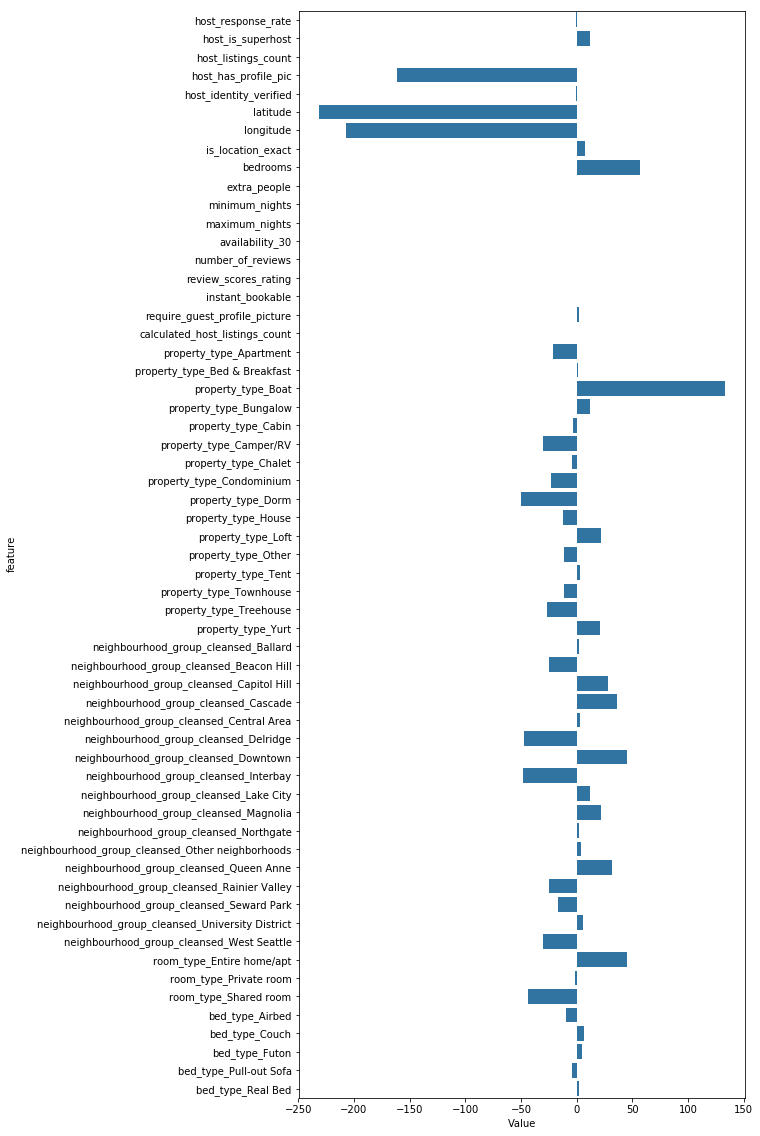

In [111]:
plt.figure(figsize=[8, 20])
sb.barplot(x="Value", y="feature", data=df_coeffs, color=base_color)
plt.show()

Half of the dependant variable variance is expained by the model's independent variables 

## 7. Conclusion <a name="conclusion"></a>

1. House and apartments are the most popular AirBnb accommodations in Seattle, accounting together for 90% of all listed properties.
2. Capitol Hill and Downtown have the highest number of Airbnb propoerties in Seattle. 
3. Number of bedrooms, property type and room type contributes to the price prediction
4. The price and availability changes over time with the summer being the most expensive time to visit Seattle. 
 
 
 
5. Simple Linear Regression gave the prediction score 43%. 
6. Additing multiple features has improved the prediction score from 43%  to 48%
7. Additing categorical features property type, neighbourhood,  room and bed type further improved the prediction score from 48%  to 55%